# Lab 4: Predicting breast cancer with machine learning

In this lab we'll read up our training and test data to create a logistic regression model. We'll use different techniques to evaluate the model and use the model for prediction on a held-out dataset. 

#### Libraries used in this lab:
[pandas docs](https://pandas.pydata.org/pandas-docs/stable/)

[seaborn docs](https://seaborn.pydata.org/)

[matplotlib docs](https://matplotlib.org/contents.html)

[numpy docs](https://docs.scipy.org/doc/numpy-1.15.1/reference/index.html)

[sklearn docs](https://scikit-learn.org/stable/documentation.html)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
%matplotlib inline

## Prepare test and train data

In [2]:
# read in data prepared from lab 2, split into two data sets
train = pd.read_csv("data_sets/lab_4_train.csv")
test = pd.read_csv("data_sets/lab_4_test.csv")

In [3]:
# create list of features, careful to remove diagnosis columns 
features = train.columns.tolist()
features.remove('diagnosis')
features.remove('diagnosis_code')

## Creating a Logistic Regression Model

In this section we use the [LogisticRegression classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) from scikit-learn library. We'll start with the default classifier settings which we will tune later on.

In [4]:
# create list of features, careful to remove diagnosis columns 
features = train.columns.tolist()
features.remove('diagnosis')
features.remove('diagnosis_code')

# fit model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(train[features], train['diagnosis_code'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

## Evaluate model: Error and Accuracy

Use held out test data to evaluate model for accuracy, error, and other metrics. Essentially we are comparing the predicted class against the true class for each example in the test set. 

In [5]:
# error and accuracy of model
from sklearn import metrics

def model_metrics(test, logreg, features):
    test_pred = logreg.predict(test[features])
    test_predict_proba = logreg.predict_proba(test[features])[:, 1]
    test_true = test['diagnosis_code']
    print('log loss (error) on test set: {:.2f}'.format(metrics.log_loss(test_true, test_predict_proba)))
    print('Accuracy of model on test set: {:.2f}'.format(metrics.accuracy_score(test_true, test_pred)))
    print('Precision of model on test set: {:.2f}'.format(metrics.precision_score(test_true, test_pred)))
    print('Recall of model on test set: {:.2f}'.format(metrics.recall_score(test_true, test_pred)))

model_metrics(test, logreg, features)

log loss (error) on test set: 0.22
Accuracy of model on test set: 0.88
Precision of model on test set: 0.93
Recall of model on test set: 0.74


The metrics above indicate that we have made a good start to creating a breast cancer predictve model. We'll attempt to improve these numbers futher in following sections

## Evaluate Model: AUC - ROC Curve

In the lecture we reviwed the AUC-ROC curve as a way to evaluate the model across threasholds. Below is the plot from the lecture.
<img src="images/auc_plot.png" style="height:500px">

In the following section we'll recreate the AUC - ROC plot on the test dataset.

AUC score of model on test set: 0.85


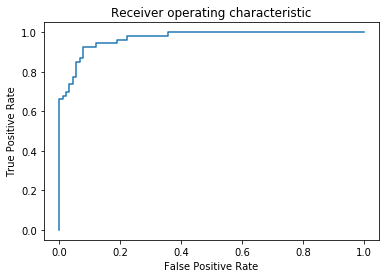

In [6]:
# create auc - roc curve
from sklearn import metrics

def create_roc_curve(test, logreg):
    test_pred = logreg.predict(test[features])
    test_true = test['diagnosis_code']
    test_predict_proba = logreg.predict_proba(test[features])[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y_true=np.array(test_true), y_score=test_predict_proba, pos_label=1)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    print('AUC score of model on test set: {:.2f}'.format(metrics.roc_auc_score(test_true, test_pred)))

create_roc_curve(test, logreg)

## Evaluate Model: Visualize Sigmoid Curve

In the lecture we reviewed the sigmoid function as it relates to making binary classificaiton. Below is the plot from the lecture.
<img src="images/sigmoid.png" style="height:500px">

In the following section we'll plot the test set prediction probabilities against the `radius_mean` dimension. The s-like curve represents presentes a visualization of the sigmoid curve. 

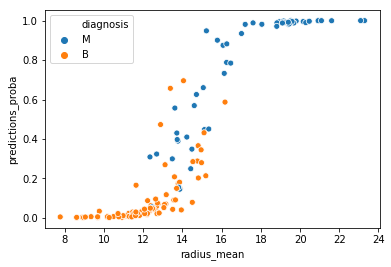

In [7]:
# create a scatter plot of prediction probabilities vs radius_mean
def create_sigmoid_plot(test, logreg, feature):
    test['predictions_proba'] = logreg.predict_proba(test[features])[:,1]
    sns.scatterplot(x=feature, y="predictions_proba", hue = "diagnosis", data=test)
    
create_sigmoid_plot(test, logreg, "radius_mean")

## Model Optimization: Hyperparameter tuning using Grid Search

Now that we have evaluated the first version of our Logistic Regression model let's see if we can improve it. We'll use scikit-learn [GridSearch method](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and apply different types of regularization over different values.

In [8]:
# range of regularization values
hyperparameters = {'C':np.logspace(0, 4, 100)}

logisticRegression = LogisticRegression(solver='lbfgs', max_iter=10000)
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(logisticRegression, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(train[features], train['diagnosis_code'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best C: 1555.6761439304723


## Exercise 1: Create and evaluate LR model for different levels of regularization

Using GridSearch above we were able to determine the best value of C to optimize our model. In this exercise please update the LR model with the new value for C, create new metrics for the model, and plot the AUC curve. To make it simple we are using the helper functions we created above: model_metrics() and create_roc_curve().

In [ ]:
# create and fit new model, please fill in missing arguments
logregV2 = LogisticRegression() 
logregV2.fit() 

In [ ]:
# evaluate model, fill in missing arguments
model_metrics()

In [ ]:
# create auc plot, fill in missing arguments
create_roc_curve()

How did your new model perform? What metrics improved or declined? Did the AUC curve value or curve change? Feel free to remake the sigmoid plot

## Prediction: Using the model to predict tumor type

In this section we'll use the first model to make predictions on the test data set. 

In [9]:
# create predictions for first row of test set
first_row_test = test.head(1)
print("test row TRUE value for tumor classfication is {}, target value {}".format(first_row_test['diagnosis'].values, first_row_test['diagnosis_code'].values))
print("test row prediction probability value {}".format(logreg.predict_proba(first_row_test[features])[:,1]))

test row TRUE value for tumor classfication is ['M'], target value [1]
test row prediction probability value [0.9915014]


# Extra material: Futher model evaluation and optimization

In the following sections we'll cover other ways to evaluate or optimize your model

## Evaluate Model: How training data size affects learning

Our dataset includes a total of 569 instances, each instance representing a tumor and it's associated features. Do we have enough data to create a good predictive model? To evaluate this we can create a learning curve. A learning curve shows the effect adding more training samples has on the model in terms of error, accuracy or other model metrics. In the example below we plot both the training data and cross-validation accuracy scores as more data is added into the model. 
 
Find more information on ploting learning curves from the [sklearn docs](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)

In [10]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)
    train_scores_mean =  np.mean(train_scores, axis=1)
    train_scores_std =  np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

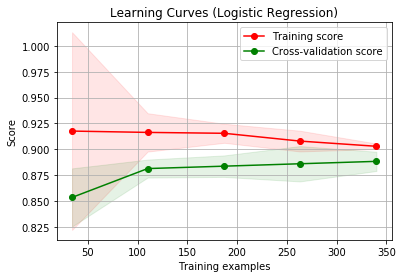

In [11]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression

title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

estimator = LogisticRegression(solver='lbfgs')
plot_learning_curve(estimator, title, train[features], train['diagnosis_code'], cv=cv, n_jobs=4, scoring='accuracy')

plt.show()

The above plot shows that both the training data and cross-validaton data score relatively high for accuracy. For either dataset we see the curves beginning to stablize approaching 350 training examples. We may achieve further convergnece between curves given more samples. 

Plotting both training accuracy and cross-validation accuracy together gives us insight into whether we have bias or variance issues with our model in how we trained it. The space between the two curves indicates that the model is suffering from some amount of variance, where the trained model does not generalize well enough to the held out validation dataset, although plotting the error of both curves will better show this potential issue (you can do that by setting `scoring` to "neg_log_loss").


## Evaluate model: Change threshold

The default threshold is 0.5 when evaluating a model for its level of accuracy. What threshold you choose for classifying tumors is up to you. If you want to mitigate the risk of false negatives (mis-classifying a malignant tumor as benign) you can set the threshold lower. The lower the threshold the less likely you'll have a false negative. However, setting a lower threshold increases your chances of having more false positives (mis-classifying a benign tumor as malignant). In this section we'll explore the affect of changing thresholds on model metrics.

In [12]:
# function for evaluting model with varying thresholds
def model_metrics_threshold(test, logreg, features, threshold):
    
    test_pred_prob = logreg.predict_proba(test[features])[:,1]
    test_pred = np.where(test_pred_prob>threshold, 1, 0)
    test_true = test['diagnosis_code']
    
    loss = metrics.log_loss(test_true, test_pred_prob)
    accuracy = metrics.accuracy_score(test_true, test_pred)
    precision = metrics.precision_score(test_true, test_pred)
    recall = metrics.recall_score(test_true, test_pred)
    
    print('log loss (error) on test set: {:.2f}'.format(loss))
    print('Accuracy of model on test set: {:.2f}'.format(accuracy))
    print('Precision of model on test set: {:.2f}'.format(precision))
    print('Recall of model on test set: {:.2f}'.format(recall))
    
    return loss, accuracy, precision, recall

# try out threshold of 0.8
metric = model_metrics_threshold(test, logreg, features, threshold=0.8)

log loss (error) on test set: 0.22
Accuracy of model on test set: 0.85
Precision of model on test set: 1.00
Recall of model on test set: 0.60


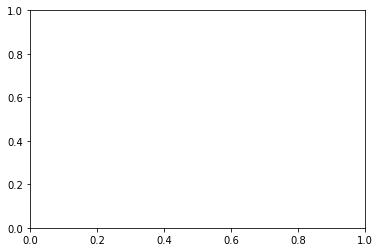

log loss (error) on test set: 0.22
Accuracy of model on test set: 0.37
Precision of model on test set: 0.37
Recall of model on test set: 1.00
log loss (error) on test set: 0.22
Accuracy of model on test set: 0.85
Precision of model on test set: 0.71
Recall of model on test set: 0.98
log loss (error) on test set: 0.22
Accuracy of model on test set: 0.88
Precision of model on test set: 0.78
Recall of model on test set: 0.94
log loss (error) on test set: 0.22
Accuracy of model on test set: 0.92
Precision of model on test set: 0.87
Recall of model on test set: 0.91
log loss (error) on test set: 0.22
Accuracy of model on test set: 0.90
Precision of model on test set: 0.90
Recall of model on test set: 0.81
log loss (error) on test set: 0.22
Accuracy of model on test set: 0.88
Precision of model on test set: 0.93
Recall of model on test set: 0.74
log loss (error) on test set: 0.22
Accuracy of model on test set: 0.87
Precision of model on test set: 0.95
Recall of model on test set: 0.70
log lo

In [15]:
# plot the recall/precision tradeoff when varying thresholds
%matplotlib inline
loss = []
accuracy = []
precision = []
recall = []
threshold = []

fig, ax = plt.subplots(1,1)
plt.show()

for th in [0.1*i for i in range(9)]:
    ax.clear()
    l, a, p, r = model_metrics_threshold(test, logreg, features, th)
    
    threshold.append(th)
    loss.append(l)
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    
    ax.set_xlabel('Threshold')
    ax.set_ylabel('Precision/Recall')
    
    ax.scatter(threshold, precision,label='precision')
    ax.scatter(threshold, recall, label='recall')
    
    ax.legend()
    ax.grid(True)
    fig.canvas.draw()

## Exercise 2: Try out different thresholds for your model

In [ ]:
# try out differnt thresholds, please fill in missing arguments
metric_new_threshold = model_metrics_threshold()

## Evaluate model: How does number of training iterations affect error? 


### Build logistic regression algorithm from scratch

In [16]:
def predict(features, weights):
    '''
    Returns 1D array of probabilities
  that the class label == 1
  '''
    z = np.matmul(features, weights)
    sigmoid = np.divide(1, 1+np.exp(-z))
    return sigmoid


In [17]:
def loss_function(features, labels, weights):
    '''
    Using Mean Absolute Error

    Features:(100,3)
    Labels: (100,1)
    Weights:(3,1)
    Returns 1D matrix of predictions
    Cost = ( log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
    '''
    observations = labels.shape[0]

    predictions = predict(features, weights)

    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1-labels)*np.log(1-predictions)

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = np.sum(cost, axis=0)/observations

    return cost

In [18]:
def update_weights(features, labels, weights, lr):
    '''
    Vectorized Gradient Descent

    Features:(200, 3)
    Labels: (200, 1)
    Weights:(3, 1)
    '''
    N = features.shape[0]

    #1 - Get Predictions
    predictions = predict(features, weights)

    #2 Transpose features from (200, 3) to (3, 200)
    # So we can multiply w the (200,1)  cost matrix.
    # Returns a (3,1) matrix holding 3 partial derivatives --
    # one for each feature -- representing the aggregate
    # slope of the cost function across all observations
    gradient = np.matmul(features.T,  predictions - labels)

    #3 Take the average cost derivative for each feature
    gradient /= N

    #4 - Multiply the gradient by our learning rate
    gradient *= lr

    #5 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights

In [19]:
def train_model(features, labels, weights, lr, iters):
    cost_history = []
    x_axis = []
    
    fig, ax = plt.subplots(1,1)
    
    plt.show()
    

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = loss_function(features, labels, weights)
        cost_history.append(cost[0])
        x_axis.append(i)
        
        ax.clear()
        ax.set_xlabel('# iteration')
        ax.set_ylabel('Loss')
        ax.scatter(x_axis, cost_history)
        fig.canvas.draw()


    return weights, cost_history

In [20]:
# Matrix representations of train and test sets
X_train = train.as_matrix(features)
X_train = np.concatenate([np.ones((X_train.shape[0],1)), X_train], axis=1)
Y_train = train.as_matrix(['diagnosis_code'])

X_test = test.as_matrix(features)
X_test = np.concatenate([np.ones((X_test.shape[0],1)), X_test], axis=1)
Y_test = test.as_matrix(['diagnosis_code'])

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(426, 11) (426, 1)
(143, 11) (143, 1)


/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


<IPython.core.display.Javascript object>


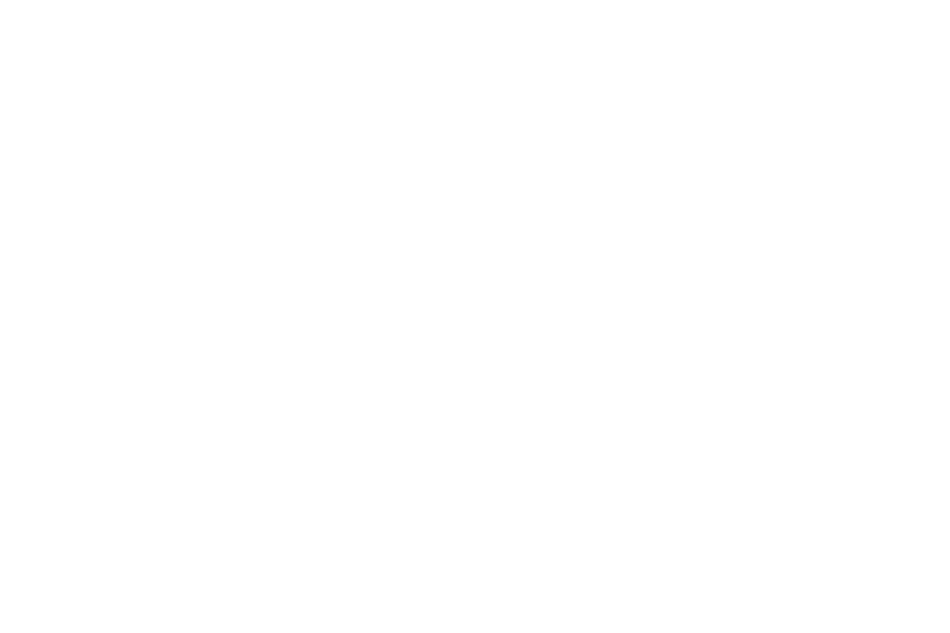

<IPython.core.display.Javascript object>


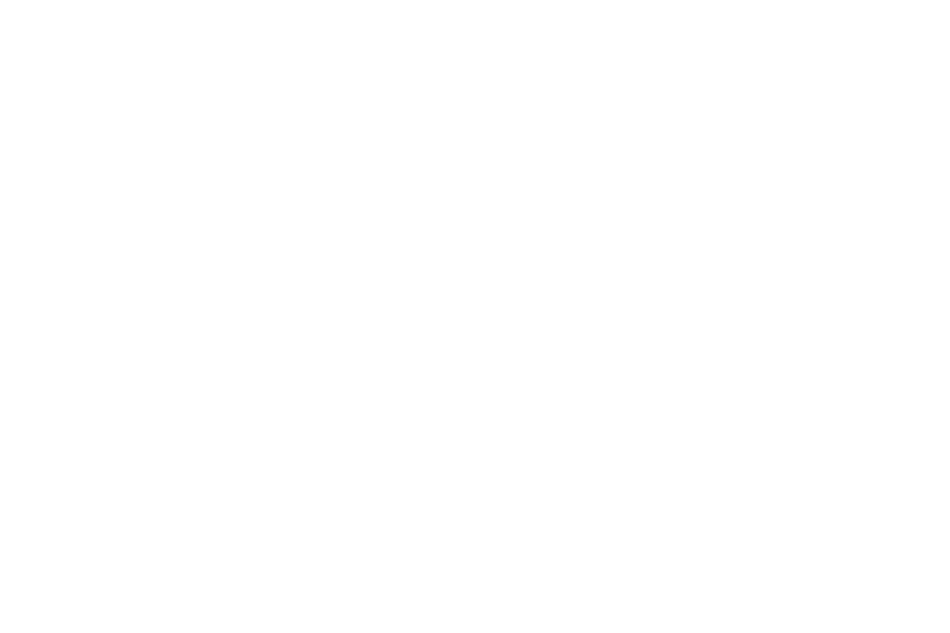

In [21]:
%matplotlib notebook
results = train_model(X_train, Y_train, np.random.random_sample((11,1)), lr=0.001, iters=100)